## Seaborn

Seaborn是基于matplotlib的图形可视化python包。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。
Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。同时它能高度兼容numpy与pandas数据结构以及scipy与statsmodels等统计模式。

### 安装
pip install seaborn

如果报错，升级一下pip
python -m pip install --upgrade pip

安装包并安装这个包所需的依赖包(sc)
pip install seaborn -U
或者
pip install scipy
pip install seaborn

## seaborn基础


In [1]:
#导入需要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#设置并使用 seaborn的主题。
sns.set(style="darkgrid")

In [2]:
tips = sns.load_dataset('tips')

### distplot
kde 是高斯分布密度图，绘图在0-1之间

hist 是否画直方图

rug 在X轴上画一些分布线

fit 可以制定某个分布进行拟合

label  legend时的值

axlabel 制定横轴的说明

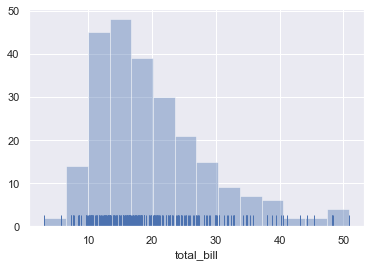

In [3]:
sns.distplot(tips['total_bill'], bins=None, hist=True, kde=False, rug=True, fit=None, 
            hist_kws=None, kde_kws=None, rug_kws=None, 
            fit_kws=None, color=None, vertical=False, 
            norm_hist=False, axlabel=None, label=None, ax=None)


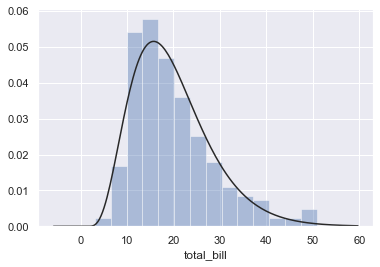

In [4]:
sns.distplot(tips.total_bill, fit=stats.gamma, kde=False)


### kdeplot
高斯概率密度图 

data2 可以是二维的分布

shade 是否填充

kernel 核函数，还有很多核函数，比如cos, biw等

cumulative 累积的作图，最后的值应该是接近1

gridsize 多少个点估计

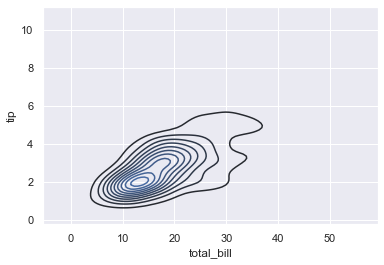

In [5]:
ax = sns.kdeplot(tips['total_bill'], data2=tips.tip, shade=False, vertical=False, 
                kernel="gau", bw="scott", 
                gridsize=100, cut=3, clip=None, 
                legend=True, cumulative=False, 
                shade_lowest=True, ax=None)

### pairplot
两两作图
iris 为例 
data: DataFrame格式的数据
hue: label类别对应的column name
vars: 指定feature的列名
kind: 作图的方式，可以是reg或scatter
diag_kind: 对角线作图的方式，可以是hist或kde

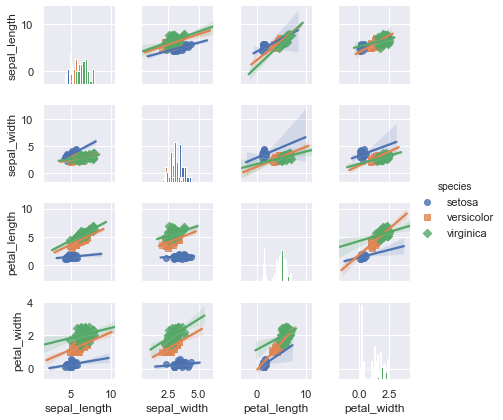

In [6]:
iris = sns.load_dataset('iris')
g = sns.pairplot(iris, hue='species', hue_order=None, palette=None, 
                 vars=list(iris.columns[0:-1]), 
                 x_vars=None, y_vars=None, 
                 kind="reg", diag_kind="hist", 
                 markers=['o','s','D'], height=1.5, aspect=1, 
                 dropna=True, plot_kws=None, 
                 diag_kws=None, grid_kws=None)

### stripplot
tips为例，查看每天的数据信息 

x: X轴数据

y: Y轴数据

hue: 区分不同种类数据的column name

data: DataFrame类型数据

jitter: 将数据分开点，防止重叠

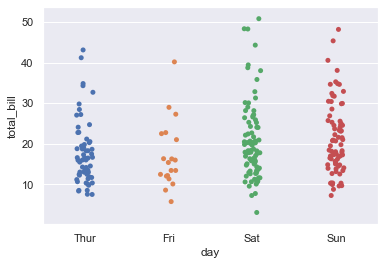

In [7]:
ax = sns.stripplot(x='day', y='total_bill', hue=None, data=tips, order=None, 
                  hue_order=None, jitter=True, 
                  dodge=False, orient=None, 
                  color=None, palette=None, size=5, 
                  edgecolor="gray", linewidth=0, 
                  ax=None)

查看关于性别消费的信息

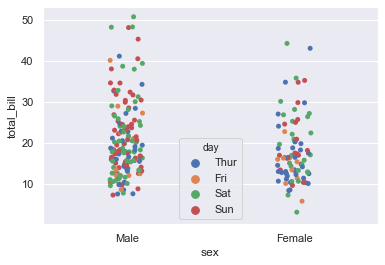

In [8]:
ax = sns.stripplot(x='sex', y='total_bill', hue='day', data=tips, order=None, 
                  hue_order=None, jitter=True, 
                  dodge=False, orient=None, 
                  color=None, palette=None, size=5, 
                  edgecolor="gray", linewidth=0, 
                  ax=None)

### swarmplot
与stripplot类似，只是数据点不会重叠 (适合小数据量)

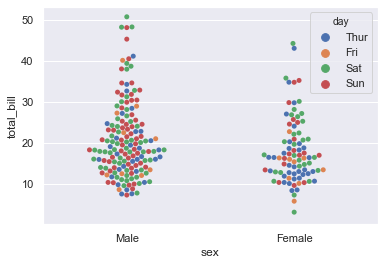

In [9]:
tips = sns.load_dataset('tips')
ax = sns.swarmplot(x='sex', y='total_bill', hue='day', data=tips)


### boxplot
示意图：
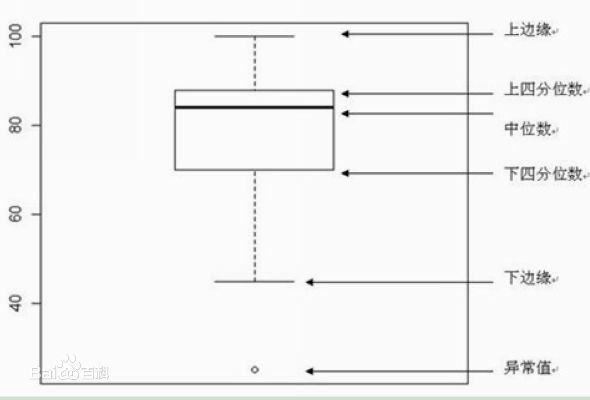
x, y：指定X轴，Y轴的columns name值

hue: 指定要区分的类别

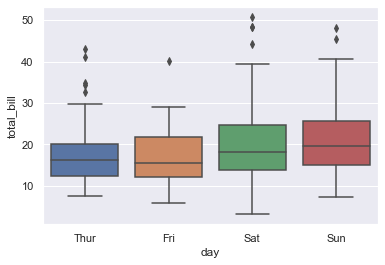

In [10]:
tips = sns.load_dataset('tips')
ax = sns.boxplot(x='day', y='total_bill', hue=None, data=tips, order=None, 
                hue_order=None, orient=None, 
                color=None, palette=None, 
                saturation=.75, width=.8, 
                fliersize=5, linewidth=None, 
                whis=1.5, notch=False, ax=None)


### jointplot
联合作图 
kind: 有“scatter” | “reg” | “resid” | “kde” | “hex”

f:\python36\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


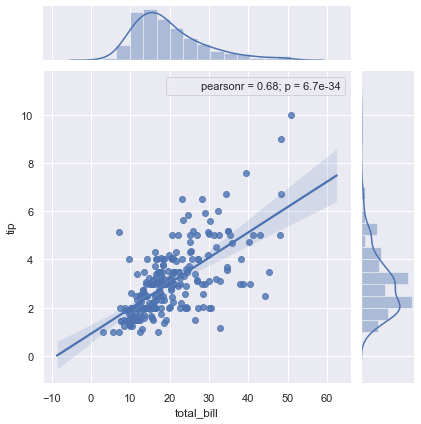

In [11]:
tips = sns.load_dataset('tips')
from scipy import stats
g = sns.jointplot(x='total_bill', y='tip',
                  data=tips, kind="reg", 
                  stat_func=stats.pearsonr, 
                  color=None, height=6, ratio=5, 
                  space=.2, dropna=True, xlim=None, 
                  ylim=None, joint_kws=None, 
                  marginal_kws=None, annot_kws=None)

可以在基础上再作图 

plot_joint就是在联合分布上作图

plot_marginals就是在边缘分布上再作图

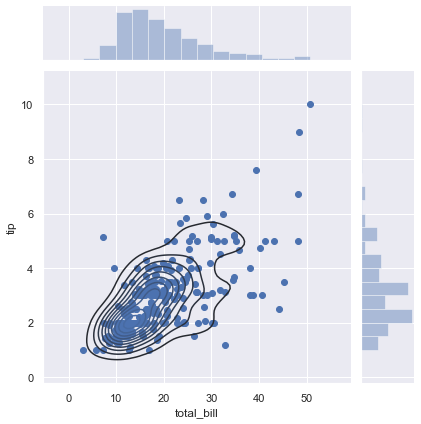

In [12]:
g = (sns.jointplot(x='total_bill', y='tip',data=tips).plot_joint(sns.kdeplot))

### violinplot
小提琴图，和boxplot很像

对称的kde图

中间的白点是中位数，黑色粗线对应分位数

inner: 指定图里面用什么划分，有"box", "quartile", "point", "stick", None 

quartile为四分位数划分

stick很像rug，就是可以看出密度情况

scale: 缩放每个图对应的area, 取值有 "area", "count", "width" 

area指定每个有相同的area

count会按数量缩放（数量少的就比较窄扁）

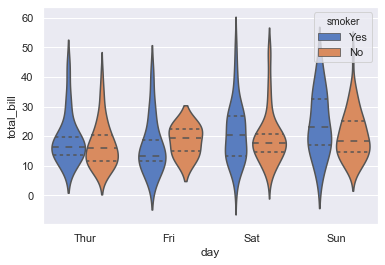

In [13]:
tips = sns.load_dataset('tips')
ax = sns.violinplot(x='day', y='total_bill', 
                    hue='smoker', data=tips, order=None, 
                    hue_order=None, bw="scott", 
                    cut=2, scale="area", 
                    scale_hue=True, gridsize=100, 
                    width=.8, inner="quartile", 
                    split=False, orient=None, 
                    linewidth=None, color=None, 
                    palette='muted', saturation=.75, 
                    ax=None) 

### pointplot
点图 

estimator：点的取值是，默认是np.mean

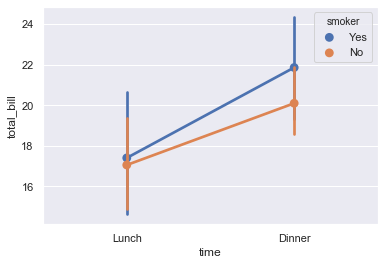

In [14]:
tips = sns.load_dataset('tips')
sns.pointplot(x='time', y='total_bill', hue='smoker', data=tips, order=None, 
             hue_order=None, estimator=np.mean, ci=95, 
             n_boot=1000, units=None, markers="o", 
             linestyles="-", dodge=False, join=True, 
             scale=1, orient=None, color=None, 
             palette=None, ax=None, errwidth=None, 
             capsize=None)

### barplot
条形图 

y轴是mean value，和点图其实差不多

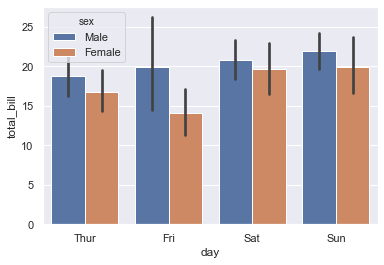

In [15]:
tips = sns.load_dataset('tips')
sns.barplot(x='day', y='total_bill', hue='sex', data=tips, order=None, 
           hue_order=None, estimator=np.mean, ci=95, 
           n_boot=1000, units=None, orient=None, 
           color=None, palette=None, saturation=.75, 
           errcolor=".26", errwidth=None, capsize=None, 
           ax=None)

### countplot


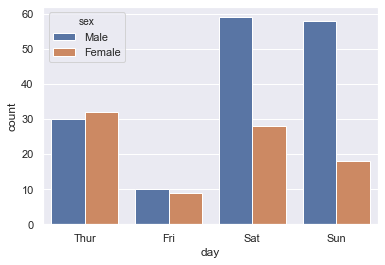

In [16]:
tips = sns.load_dataset('tips')
sns.countplot(x='day', hue='sex', data=tips) 

### 绘制单变量分布
seaborn中单变量分布的最方便的方法是distplot()功能。默认情况下，这将绘制直方图并拟合核密度估计（KDE）。

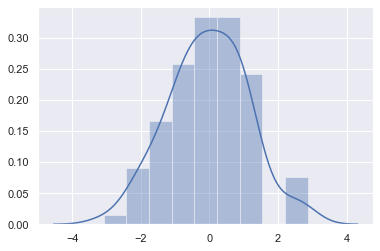

In [17]:
# kde表示生成核密度估计
x = np.random.normal(size=100)
sns.distplot(x)
#sns.distplot(x, kde=True)

更精细的刻画，调节bins，对数据更具体的做分桶操作。

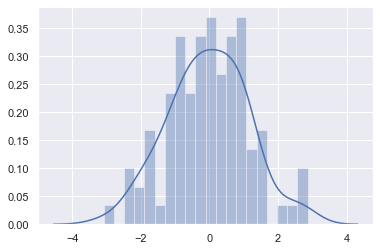

In [18]:
sns.distplot(x, kde=True, bins=20)

使用rug生成实例，生成实例的好处：指导你设置合适的bins。

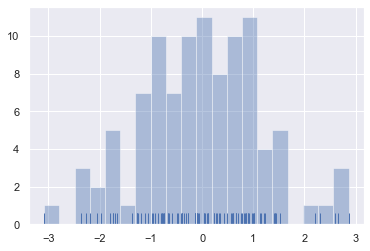

In [19]:
sns.distplot(x, kde=False, bins=20, rug=True)

#### 核密度估计
通过观测估计概率密度函数的形状。 
有什么用呢？待定系数法求概率密度函数~

核密度估计的步骤： 
* 每一个观测附近用一个正态分布曲线近似 
* 叠加所有观测的正太分布曲线 
* 归一化

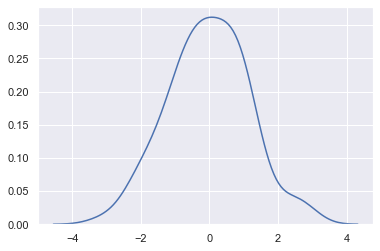

In [20]:
sns.kdeplot(x)

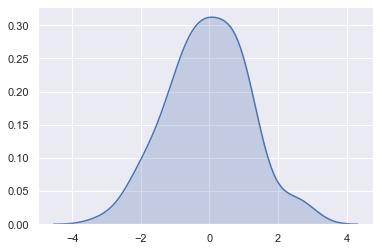

In [21]:
sns.kdeplot(x, shade=True);

bandwidth的概念：用于近似的正态分布曲线的宽度。


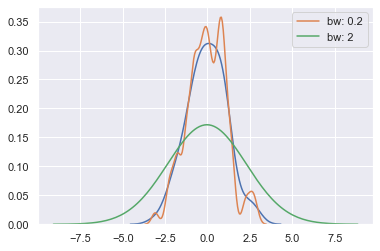

In [22]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

#### 模型参数拟合

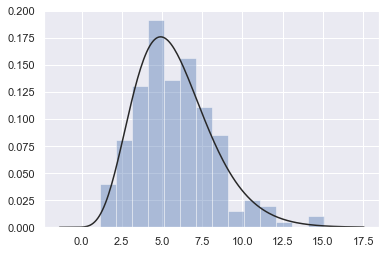

In [23]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

### 双变量分布
两个相关的正态分布~

In [24]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

#### 散点图

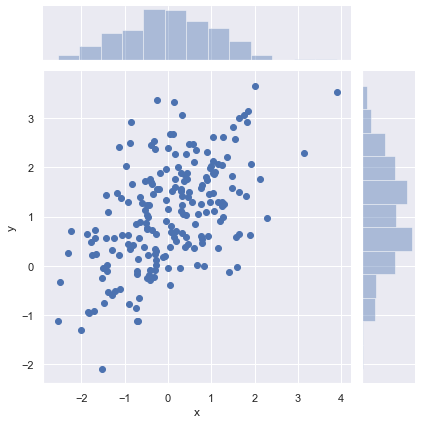

In [25]:
sns.jointplot(x="x", y="y", data=df)

#### 六角箱图
在数据量很大的时候，用散点图来做可视化的时候效果不是很好，所以引入六角箱图做可视化。

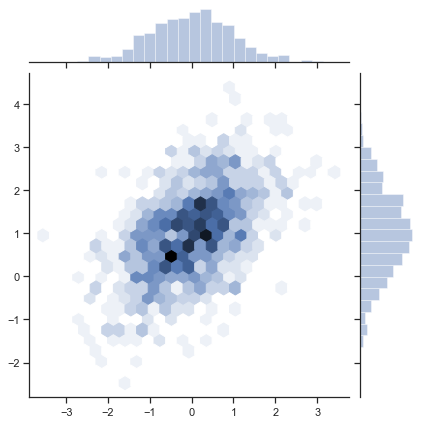

In [26]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("ticks"):
    sns.jointplot(x=x, y=y, kind="hex")

#### 核密度估计


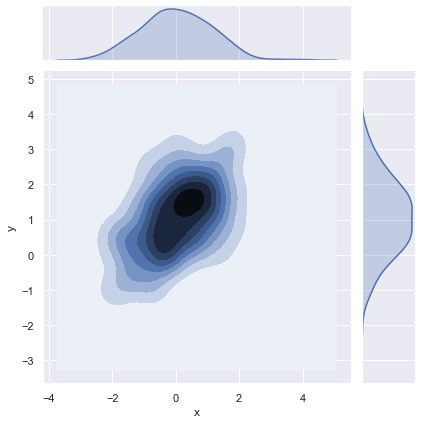

In [27]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

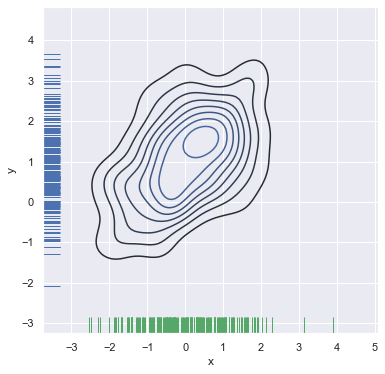

In [28]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

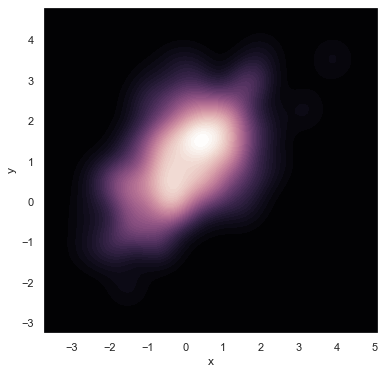

In [29]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

先绘制图形图像，然后再往图中添加额外的效果。

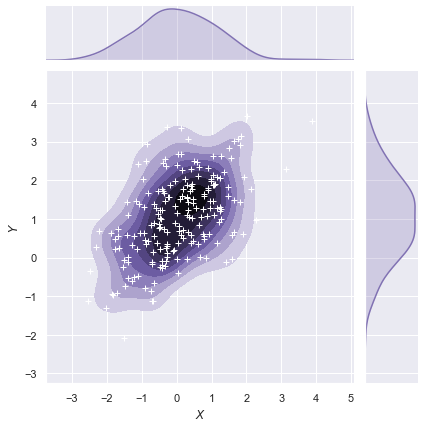

In [30]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

In [31]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


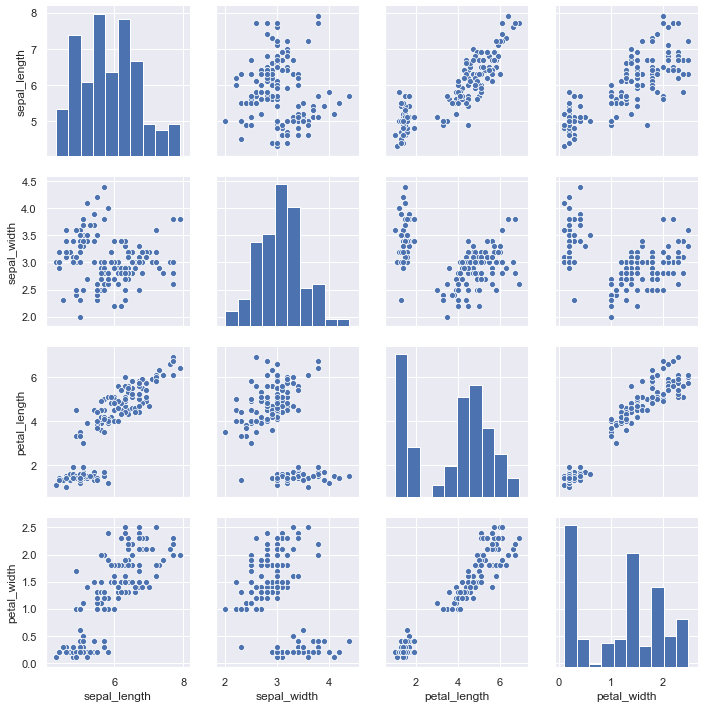

In [32]:
sns.pairplot(iris)

#### 灰度图表示

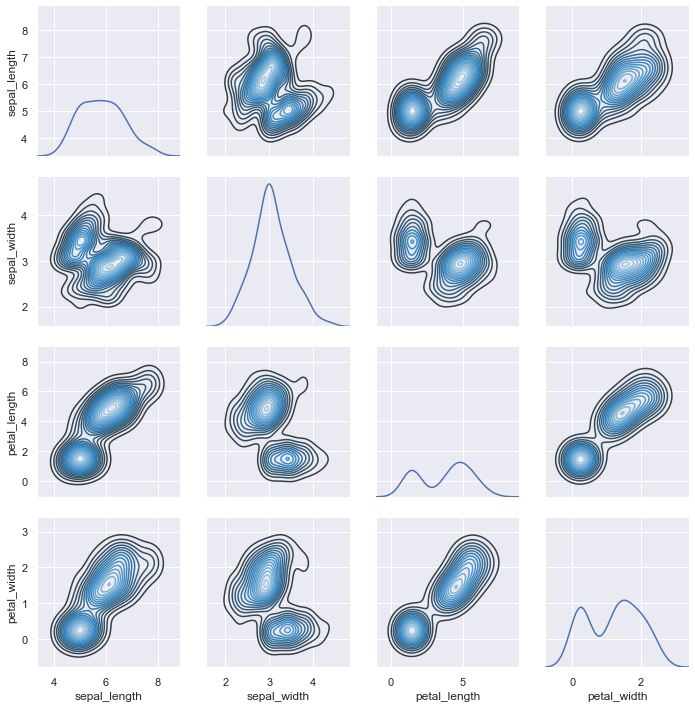

In [33]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=20)

In [34]:
tips =  pd.read_csv("tips.csv")

#### 绘制线性回归模型
最简单的方式：散点图 + 线性回归 + 95%置信区间

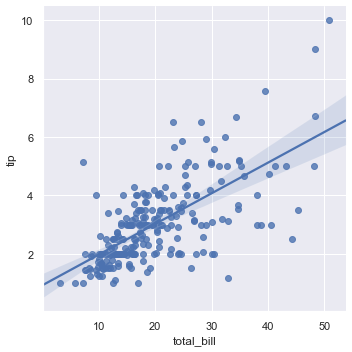

In [35]:
sns.lmplot(x="total_bill", y="tip", data=tips)

#### 离散变量
对于变量离线取值，散点图绘制出来的效果并不好，很难看出各个数据的分布。为了看清数据的分布，一下有两种方式进行处理。

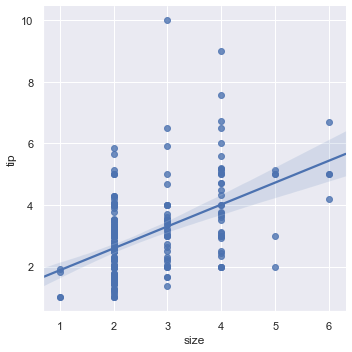

In [36]:
sns.lmplot(x="size", y="tip", data=tips)

方法1：加个小的抖动

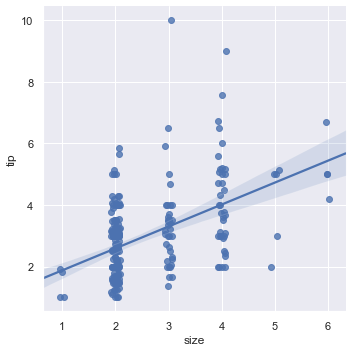

In [37]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.08)

方法2：离散取值上用均值和置信区间代替散点，求出均值和方差并在图上表示

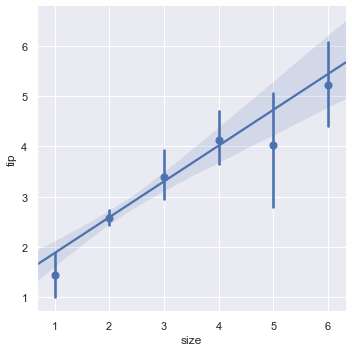

In [38]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

#### 拟合不同模型
有些时候线性拟合效果不错，但有时数据的分布并不适合用线性方式拟合。

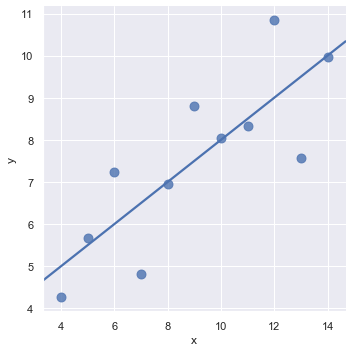

In [39]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, scatter_kws={"s": 80})

如图，用线性拟合的方式效果不是很好

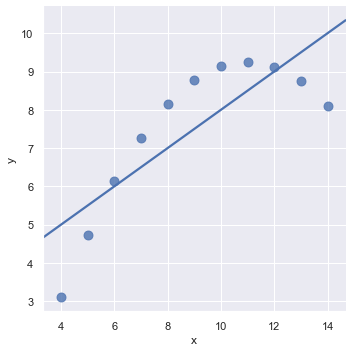

In [40]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 80})

#### 高阶拟合


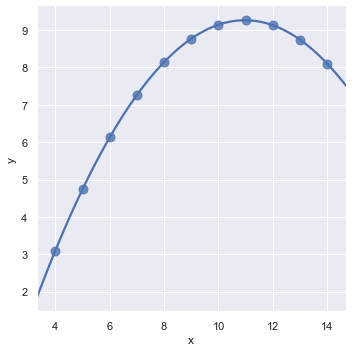

In [41]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, ci=None, scatter_kws={"s": 80})

#### 异常值处理

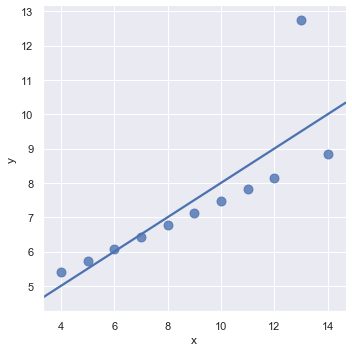

In [42]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

在存在异常值的情况下，拟合稳健回归可能很有用，该回归使用不同的损失函数来减轻相对较大的残差：

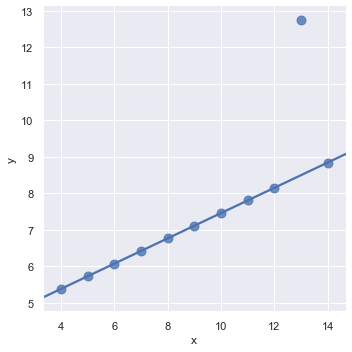

In [43]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

二值变量拟合：对于运用线性来拟合效果并不是很好，所以一下运用logistic的方式对二类进行分类。

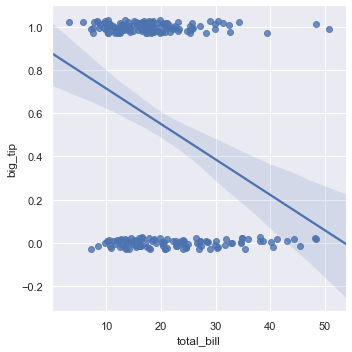

In [44]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

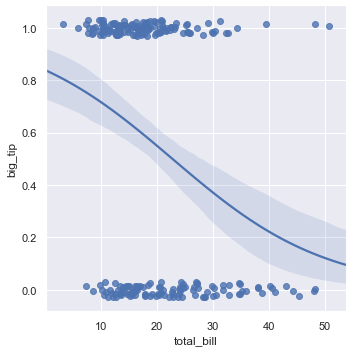

In [45]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

通过seaborn对数据可视化可以看出数据的分布等情况。

官方文档地址：http://seaborn.pydata.org/index.html